In [1]:
from RNAFoldAssess.utils import SequenceTools

In [2]:
import pandas as pd

easy_df = pd.read_csv("easy_complete.csv")
hard_df = pd.read_csv("hard_complete.csv")
hard_df.head()

,dataset,datapoint,sequence,ContextFold_accuracy,ContextFold_prediction,ContraFold_accuracy,ContraFold_prediction,EternaFold_accuracy,EternaFold_prediction,IPKnot_accuracy,...,MXFold_prediction,MXFold2_accuracy,MXFold2_prediction,SPOT-RNA_accuracy,SPOT-RNA_prediction,mfe,ens_def,sequence_entropy,gc_content,length
0,EternaData,ETCROS_VN1_0001_ANNOTATION_9,GGGCCGGCUCGAGCCCAGCCCGGAAACGGGCUGGCCAGAGAUAGCG...,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,...,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.660526,.....(((((((((((((((((....))))))))(((((((((......,-70.0,0.19,0.938412,0.657143,105
1,EternaData,ETERNA_R00_0000_ANNOTATION_1031,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAGAUAAAAGCUA...,0.612414,................................((((((....((((...,0.649866,................................(((((((...((((...,0.649866,................................(((((((...((((...,0.649866,...,(...............................(((((((...((((...,0.649866,................................(((((((...((((...,0.620553,................................(((((((...((((...,-24.5,0.39,0.783623,0.261682,107
2,EternaData,ETERNA_R00_0000_ANNOTATION_1036,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAUGUUCCCAUAG...,0.549310,................................(((((((....(((...,0.550067,................................(((((((...((((...,0.550067,................................(((((((...((((...,0.550067,...,(...............................(((((((...((((...,0.550067,................................(((((((...((((...,0.560526,...............................(((((......))))...,-20.8,0.88,0.839285,0.308411,107
3,EternaData,ETERNA_R00_0000_ANNOTATION_1100,GGAAAAAAAAAAGCUGAGUACGAAGUACAGCACGAAGUGCAGAGCA...,0.590412,............((((.............((((...)))).((((....,0.633721,............((((..(((...)))))))((...))((.((((....,0.610788,............(((..((((...)))))))((...))((.((((....,0.638782,...,(...........(((..((((...)))))))......(((.((((....,0.601634,............((((.((((...)))).((((...)))).((((....,0.592424,......................(......((((...)))).((((....,-28.4,2.42,0.919512,0.467290,107
4,EternaData,ETERNA_R00_0000_ANNOTATION_1125,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGA...,0.661458,............................................((...,0.661458,............................................((...,0.661458,............................................((...,0.661458,...,(...........................................((...,0.661458,............................................((...,0.595825,............................................((...,-14.9,0.11,0.640772,0.224299,107


In [5]:
hcounts = [4,5,6]

for count in hcounts:
    easy_df[f"a_homopolymer{count}"] = easy_df["sequence"].apply(lambda s: SequenceTools.count_homopolymers(s, count, "A"))
    hard_df[f"a_homopolymer{count}"] = hard_df["sequence"].apply(lambda s: SequenceTools.count_homopolymers(s, count, "A"))

In [7]:
for count in hcounts:
    print(f"({count}) Easy - max: {easy_df[f'a_homopolymer{count}'].max()}, min: {easy_df[f'a_homopolymer{count}'].min()}")
    print(f"({count}) Hard - max: {hard_df[f'a_homopolymer{count}'].max()}, min: {hard_df[f'a_homopolymer{count}'].min()}")
    print()

(4) Easy - max: 39, min: 0
(4) Hard - max: 67, min: 0

(5) Easy - max: 31, min: 0
(5) Hard - max: 65, min: 0

(6) Easy - max: 24, min: 0
(6) Hard - max: 64, min: 0



In [11]:
(easy_df["a_homopolymer6"] >= 20).sum()

2

In [12]:
models = ['ContextFold',
 'ContraFold',
 'EternaFold',
 'IPKnot',
 'NeuralFold',
 'NUPACK',
 'RNAFold',
 'RNAStructure',
 'pKnots',
 'Simfold',
 'MXFold',
 'MXFold2',
 'SPOT-RNA']


score_cols = [f"{m}_accuracy" for m in models if f"{m}_accuracy" in easy_df.columns]
easy_df["avg_accuracy"] = easy_df[score_cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)
hard_df["avg_accuracy"] = hard_df[score_cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)
hard_df

,dataset,datapoint,sequence,ContextFold_accuracy,ContextFold_prediction,ContraFold_accuracy,ContraFold_prediction,EternaFold_accuracy,EternaFold_prediction,IPKnot_accuracy,...,SPOT-RNA_prediction,mfe,ens_def,sequence_entropy,gc_content,length,a_homopolymer4,a_homopolymer5,a_homopolymer6,avg_accuracy
0,EternaData,ETCROS_VN1_0001_ANNOTATION_9,GGGCCGGCUCGAGCCCAGCCCGGAAACGGGCUGGCCAGAGAUAGCG...,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,...,.....(((((((((((((((((....))))))))(((((((((......,-70.0,0.19,0.938412,0.657143,105,0,0,0,0.652931
1,EternaData,ETERNA_R00_0000_ANNOTATION_1031,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAGAUAAAAGCUA...,0.612414,................................((((((....((((...,0.649866,................................(((((((...((((...,0.649866,................................(((((((...((((...,0.649866,...,................................(((((((...((((...,-24.5,0.39,0.783623,0.261682,107,31,27,25,0.644480
2,EternaData,ETERNA_R00_0000_ANNOTATION_1036,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAUGUUCCCAUAG...,0.549310,................................(((((((....(((...,0.550067,................................(((((((...((((...,0.550067,................................(((((((...((((...,0.550067,...,...............................(((((......))))...,-20.8,0.88,0.839285,0.308411,107,29,27,25,0.553276
3,EternaData,ETERNA_R00_0000_ANNOTATION_1100,GGAAAAAAAAAAGCUGAGUACGAAGUACAGCACGAAGUGCAGAGCA...,0.590412,............((((.............((((...)))).((((....,0.633721,............((((..(((...)))))))((...))((.((((....,0.610788,............(((..((((...)))))))((...))((.((((....,0.638782,...,......................(......((((...)))).((((....,-28.4,2.42,0.919512,0.467290,107,8,6,5,0.611771
4,EternaData,ETERNA_R00_0000_ANNOTATION_1125,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGA...,0.661458,............................................((...,0.661458,............................................((...,0.661458,............................................((...,0.661458,...,............................................((...,-14.9,0.11,0.640772,0.224299,107,50,46,43,0.651694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,Ribonanza,fe95df322221,GGGAACGACUCGAGUAGAGUCGAAAAAUACUUACCUGGCAGGGGAG...,0.641496,(((.....))).....((((.................(((((((.....,0.562243,.....((((((.....))))))...............(((.(((((...,0.567669,.....((((((.....))))))................(..(((((...,0.535517,...,.....((((((.....))))))...............(....((.....,-80.5,42.81,0.996235,0.508547,234,3,1,0,0.563199
4419,Ribonanza,feca3f8b8b42,GGGAACGACUCGAGUAGAGUCGAACCAAGCUCAGUUGCCGGGCGGG...,0.608733,(((..((((((.....)))))).......))).(((.(((.(((((...,0.546738,.((..((((((.....))))))..))..........((((((((((...,0.583196,((...((((((.....))))))..))..........((((((((((...,0.667680,...,.....((((((.....))))))..................(........,-112.4,45.03,0.977006,0.618321,262,1,0,0,0.593453
4420,Ribonanza,fed077d8381c,GGGAACGACUCGAGUAGAGUCGAAAAGGUCAAUGAUGAAUGGUAAA...,0.594983,((((..(((((.....)))))............................,0.556127,.....((((((.....))))))....((((.....((((((((......,0.576481,.....((((((.....))))))....((((...(.((((((((......,0.574192,...,.....((((((.....))))))....((((...............(...,-116.5,45.62,0.998890,0.510448,335,3,0,0,0.573887
4421,Ribonanza,fef4013abae1,GGAAACAAACAAACCGGAGGGAAAAGUUAUCAGGCAUGCACCUGGU...,0.600680,........................((((((((((......))))))...,0.565240,........................((((((((((......))))))...,0.566618,...................((...((((((((((......))))))...,0.603552,...,........................((((((((((......))))))...,-135.0,51.21,0.983320,0.441109,433,4,1,0,0.598465


/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/1052890390.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby(["6A_homopolymer_bin", "group"]).size().unstack(fill_value=0)


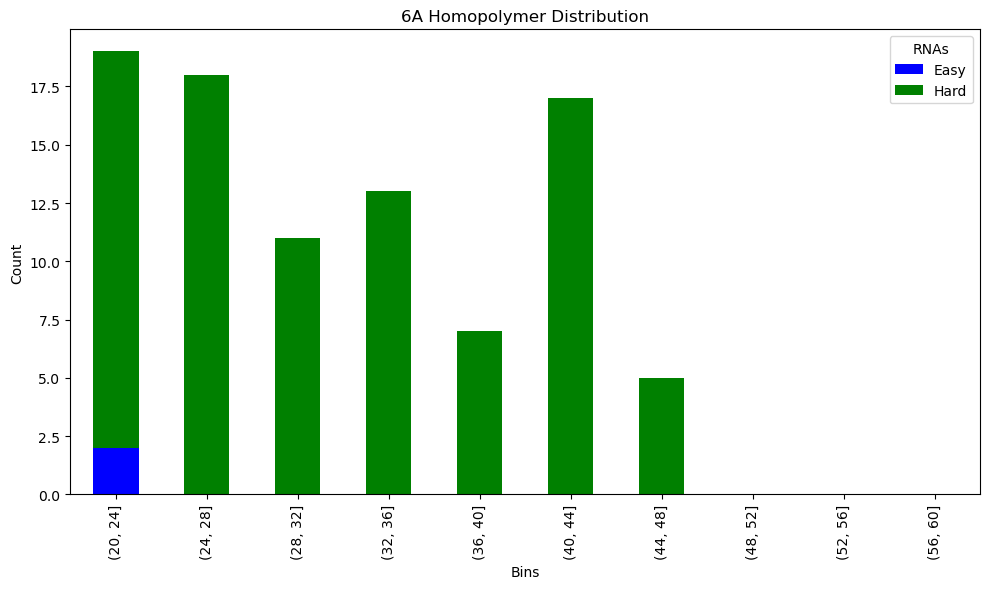

In [13]:
import matplotlib.pyplot as plt

easy_df["group"] = "Easy"
hard_df["group"] = "Hard"

combined = pd.concat([easy_df, hard_df])

# Bin gc_content into ranges (adjust bin size as needed)
bins = range(20, 64, 4)  # e.g., bins of width 5 if gc_content is %
combined["6A_homopolymer_bin"] = pd.cut(combined["a_homopolymer6"], bins)

# Count occurrences per bin per group
counts = combined.groupby(["6A_homopolymer_bin", "group"]).size().unstack(fill_value=0)

# Make stacked bar chart
counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["blue", "green"]
)

plt.title("6A Homopolymer Distribution")
plt.xlabel("Bins")
plt.ylabel("Count")
plt.legend(title="RNAs")
plt.tight_layout()
plt.show()

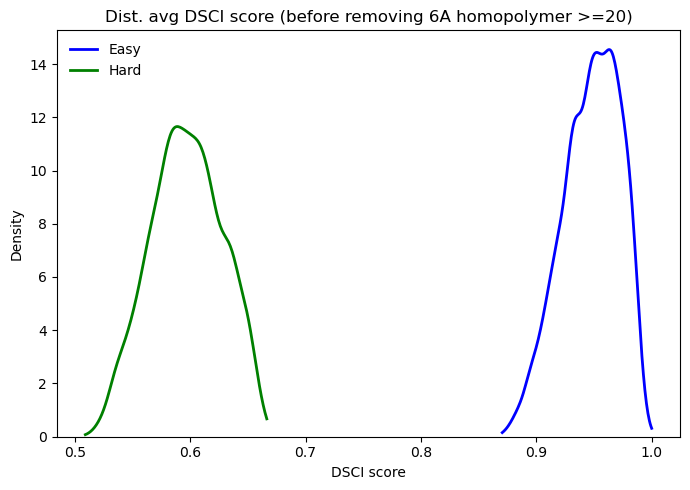

In [19]:
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.kdeplot(
    data=easy_df,
    x="avg_accuracy",
    color="blue",
    label="Easy",
    lw=2,
    cut=0
)
sns.kdeplot(
    data=hard_df,
    x="avg_accuracy",
    color="green",
    label="Hard",
    lw=2,
    cut=0
)
plt.title(f"Dist. avg DSCI score (before removing 6A homopolymer >=20)")
plt.xlabel("DSCI score")
plt.ylabel("Density")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

In [26]:
easy_filtered = easy_df.loc[easy_df["a_homopolymer6"] < 20].copy()
hard_filtered = hard_df.loc[hard_df["a_homopolymer6"] < 20].copy()

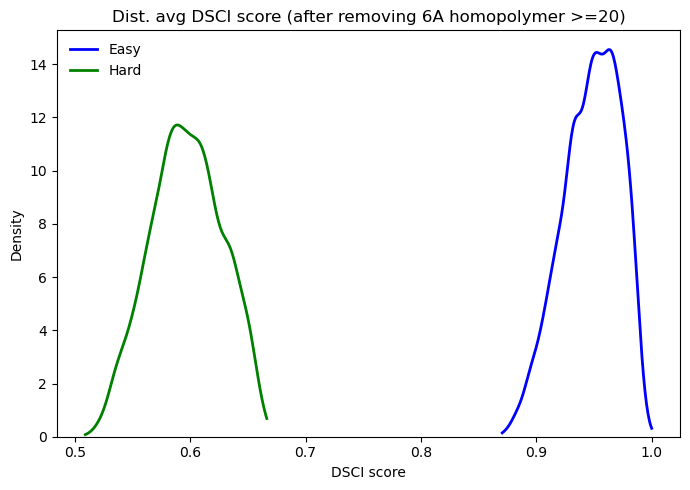

In [27]:
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.kdeplot(
    data=easy_filtered,
    x="avg_accuracy",
    color="blue",
    label="Easy",
    lw=2,
    cut=0
)
sns.kdeplot(
    data=hard_filtered,
    x="avg_accuracy",
    color="green",
    label="Hard",
    lw=2,
    cut=0
)
plt.title(f"Dist. avg DSCI score (after removing 6A homopolymer >=20)")
plt.xlabel("DSCI score")
plt.ylabel("Density")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

In [28]:
all_data_df = pd.read_csv("chemical_mapping_matched_set.txt", skipinitialspace=True)
all_data_df.head()

,dataset,model,datapoint,sequence,prediction,score
0,EternaData,ContextFold,ETOBCR_VN1_0001_ANNOTATION_1,GGUGGUAUUCUAAGCGAUGGUGAAACUACUAUUGGGCUUUCUACUC...,.((.....((((((.(..((.....(((....))).....)).).)...,0.574324
1,EternaData,ContextFold,ETOBCR_VN1_0001_ANNOTATION_3,GGCAGAUCGGACUUGUGAAAAUAAUAAUUUUCGCCCGAUGUUCGCU...,.....((((((((.((((((........))))))((((.((((......,0.715321
2,EternaData,ContextFold,ETOBCR_VN1_0001_ANNOTATION_4,GGCAGAUCGGACUUGUGAAAAUAAUAAUUUUCGCCCGAUGUUCGCU...,.....((((((((.((((((........))))))((((.((((......,0.751035
3,EternaData,ContextFold,ETOBCR_VN1_0001_ANNOTATION_5,GGGAGCCGCUACGUACUUGCUUUCAUAAGCAAGUUAGGUGCGUUGC...,.(((((.....(..((((((((....))))))))..)((((...))...,0.479255
4,EternaData,ContextFold,ETOBCR_VN1_0001_ANNOTATION_6,GGGAGCCGCUACGUACUUGCUUUCAUAAGCAAGUUAGGUGCGUUGC...,.(((((.....(..((((((((....))))))))..)((((...))...,0.621277


In [29]:
# Keep only the three columns, then de-duplicate on `datapoint`
cols = ["dataset", "datapoint", "sequence"]
all_data_df = (
    all_data_df.loc[:, cols]
    .drop_duplicates(subset="datapoint", keep="first")
    .reset_index(drop=True)
)


In [30]:
all_data_df.head()

,dataset,datapoint,sequence
0,EternaData,ETOBCR_VN1_0001_ANNOTATION_1,GGUGGUAUUCUAAGCGAUGGUGAAACUACUAUUGGGCUUUCUACUC...
1,EternaData,ETOBCR_VN1_0001_ANNOTATION_3,GGCAGAUCGGACUUGUGAAAAUAAUAAUUUUCGCCCGAUGUUCGCU...
2,EternaData,ETOBCR_VN1_0001_ANNOTATION_4,GGCAGAUCGGACUUGUGAAAAUAAUAAUUUUCGCCCGAUGUUCGCU...
3,EternaData,ETOBCR_VN1_0001_ANNOTATION_5,GGGAGCCGCUACGUACUUGCUUUCAUAAGCAAGUUAGGUGCGUUGC...
4,EternaData,ETOBCR_VN1_0001_ANNOTATION_6,GGGAGCCGCUACGUACUUGCUUUCAUAAGCAAGUUAGGUGCGUUGC...


In [31]:
hcounts = [4,5,6,7,8]

for count in hcounts:
    all_data_df[f"a_homopolymer{count}"] = all_data_df["sequence"].apply(lambda s: SequenceTools.count_homopolymers(s, count, "A"))

In [32]:
for count in hcounts:
    print(f"({count}) All - max: {all_data_df[f'a_homopolymer{count}'].max()}, min: {all_data_df[f'a_homopolymer{count}'].min()}")

(4) All - max: 71, min: 0
(5) All - max: 69, min: 0
(6) All - max: 67, min: 0
(7) All - max: 65, min: 0
(8) All - max: 64, min: 0


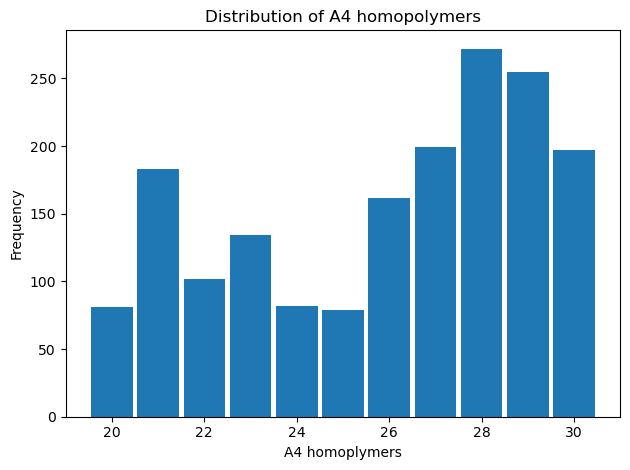

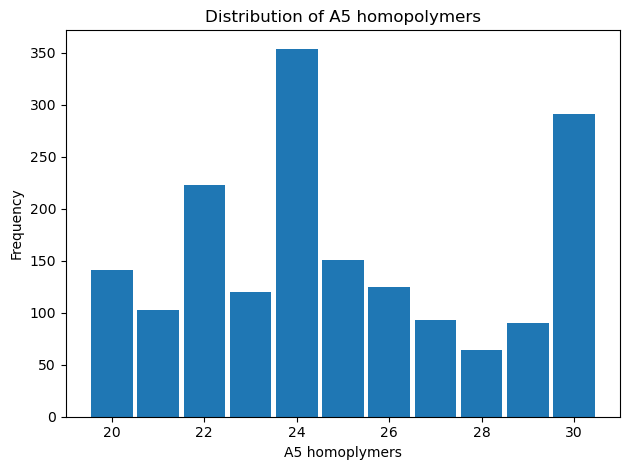

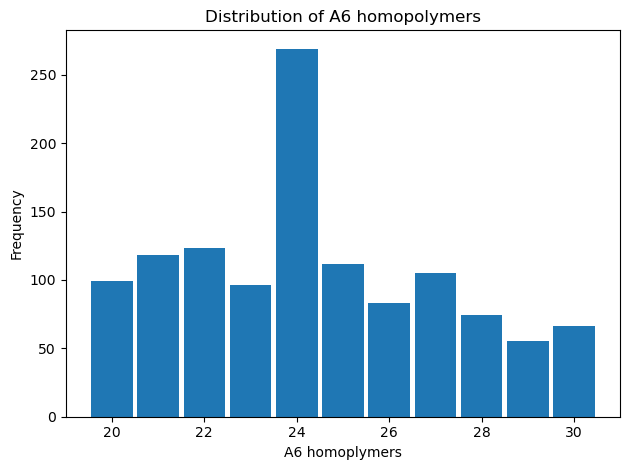

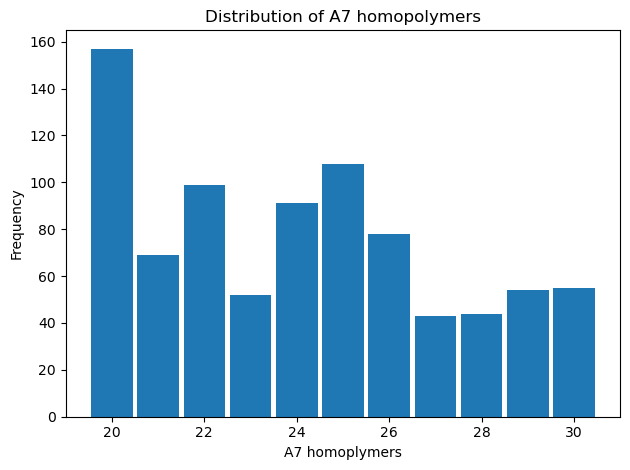

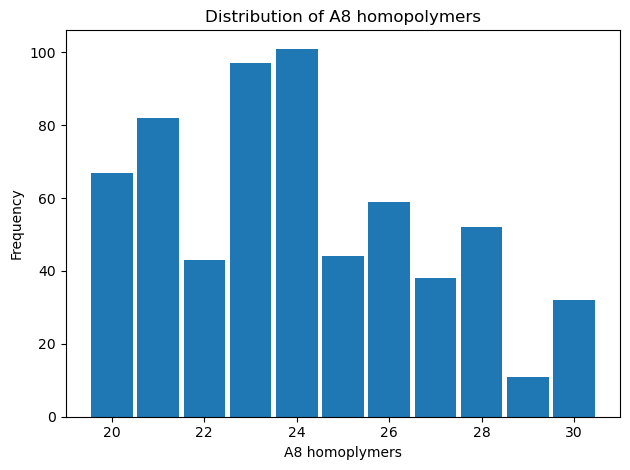

In [37]:
for count in hcounts:
    s = all_data_df[f"a_homopolymer{count}"]
    # bins = range(10, int(s.max()) + 2)  # +2 so the last value is included
    bins = range(20, 32)
    plt.figure()
    plt.hist(s, bins=bins, align="left", rwidth=0.9)
    plt.xlabel(f"A{count} homoplymers")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of A{count} homopolymers")
    plt.tight_layout()
    plt.show()


In [38]:
all_data_df.head()

,dataset,datapoint,sequence,a_homopolymer4,a_homopolymer5,a_homopolymer6,a_homopolymer7,a_homopolymer8
0,EternaData,ETOBCR_VN1_0001_ANNOTATION_1,GGUGGUAUUCUAAGCGAUGGUGAAACUACUAUUGGGCUUUCUACUC...,1,0,0,0,0
1,EternaData,ETOBCR_VN1_0001_ANNOTATION_3,GGCAGAUCGGACUUGUGAAAAUAAUAAUUUUCGCCCGAUGUUCGCU...,1,0,0,0,0
2,EternaData,ETOBCR_VN1_0001_ANNOTATION_4,GGCAGAUCGGACUUGUGAAAAUAAUAAUUUUCGCCCGAUGUUCGCU...,1,0,0,0,0
3,EternaData,ETOBCR_VN1_0001_ANNOTATION_5,GGGAGCCGCUACGUACUUGCUUUCAUAAGCAAGUUAGGUGCGUUGC...,0,0,0,0,0
4,EternaData,ETOBCR_VN1_0001_ANNOTATION_6,GGGAGCCGCUACGUACUUGCUUUCAUAAGCAAGUUAGGUGCGUUGC...,0,0,0,0,0


In [42]:
(all_data_df["a_homopolymer6"] >= 24).sum()

1306

In [46]:
remove_these = all_data_df.loc[all_data_df["a_homopolymer6"] >= 24].copy()

In [47]:
remove_these.shape

(1306, 8)

In [48]:
dps = remove_these["datapoint"].tolist()
dps

['ETERNA_R83_0003_ANNOTATION_297',
 'ETERNA_R83_0003_ANNOTATION_298',
 'ETERNA_R83_0003_ANNOTATION_299',
 'ETERNA_R83_0003_ANNOTATION_304',
 'ETERNA_R83_0003_ANNOTATION_305',
 'ETERNA_R83_0003_ANNOTATION_306',
 'ETERNA_R83_0003_ANNOTATION_310',
 'ETERNA_R83_0003_ANNOTATION_795',
 'ETERNA_R83_0003_ANNOTATION_796',
 'ETERNA_R83_0003_ANNOTATION_797',
 'ETERNA_R83_0003_ANNOTATION_802',
 'ETERNA_R83_0003_ANNOTATION_803',
 'ETERNA_R83_0003_ANNOTATION_804',
 'ETERNA_R83_0003_ANNOTATION_808',
 'ETERNA_R00_0000_ANNOTATION_79',
 'ETERNA_R00_0000_ANNOTATION_80',
 'ETERNA_R00_0000_ANNOTATION_81',
 'ETERNA_R00_0000_ANNOTATION_82',
 'ETERNA_R00_0000_ANNOTATION_83',
 'ETERNA_R00_0000_ANNOTATION_84',
 'ETERNA_R00_0000_ANNOTATION_85',
 'ETERNA_R00_0000_ANNOTATION_86',
 'ETERNA_R00_0000_ANNOTATION_87',
 'ETERNA_R00_0000_ANNOTATION_88',
 'ETERNA_R00_0000_ANNOTATION_89',
 'ETERNA_R00_0000_ANNOTATION_90',
 'ETERNA_R00_0000_ANNOTATION_91',
 'ETERNA_R00_0000_ANNOTATION_92',
 'ETERNA_R00_0000_ANNOTATION_93',


In [49]:
with open(f"datapoints_with_gte24_6A_homopolymers.txt", "w") as fh:
    fh.write("\n".join(dps))

In [52]:
from RNAFoldAssess.utils import SecondaryStructureTools

In [56]:
tseq = hard_df.iloc[0]["sequence"]
tstc = hard_df.iloc[0]["ContraFold_prediction"]

In [57]:
tstc

'.....(((((((((((((((((....))))))))(((((((((....)))))))))((((((((....)))))))))))))))))....................'

In [58]:
pairings = SecondaryStructureTools.get_pairings(tseq, tstc)

In [60]:
pairings
pairing_findings = []
chain = ""
for p in pairings:
    if p == "GC":
        chain += p
    else:
        pairing_findings.append(chain)
        chain = ""


In [72]:
def find_longest_sequential_gc_pairing(sequence, structure):
    pairings = SecondaryStructureTools.get_pairings(sequence, structure)
    findings = []
    chain = ""
    for p in pairings:
        if p == "GC":
            chain += p
        else:
            findings.append(chain)
            chain = ""
    longest = max(findings)
    return int(len(longest) / 2)

In [73]:
for m in models:
    pred_col = f"{m}_prediction"
    if pred_col in hard_df.columns:
        hard_df[f"{m}_longest_GC_pairing"] = hard_df.apply(lambda row: find_longest_sequential_gc_pairing(row["sequence"], row[pred_col]), axis=1)
        easy_df[f"{m}_longest_GC_pairing"] = easy_df.apply(lambda row: find_longest_sequential_gc_pairing(row["sequence"], row[pred_col]), axis=1)

In [75]:
hard_df.head()

,dataset,datapoint,sequence,ContextFold_accuracy,ContextFold_prediction,ContraFold_accuracy,ContraFold_prediction,EternaFold_accuracy,EternaFold_prediction,IPKnot_accuracy,...,IPKnot_longest_GC_pairing,NeuralFold_longest_GC_pairing,NUPACK_longest_GC_pairing,RNAFold_longest_GC_pairing,RNAStructure_longest_GC_pairing,pKnots_longest_GC_pairing,Simfold_longest_GC_pairing,MXFold_longest_GC_pairing,MXFold2_longest_GC_pairing,SPOT-RNA_longest_GC_pairing
0,EternaData,ETCROS_VN1_0001_ANNOTATION_9,GGGCCGGCUCGAGCCCAGCCCGGAAACGGGCUGGCCAGAGAUAGCG...,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,...,3,3,2,3,3,3,3,3,3,3
1,EternaData,ETERNA_R00_0000_ANNOTATION_1031,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAGAUAAAAGCUA...,0.612414,................................((((((....((((...,0.649866,................................(((((((...((((...,0.649866,................................(((((((...((((...,0.649866,...,1,1,1,1,1,1,1,1,1,1
2,EternaData,ETERNA_R00_0000_ANNOTATION_1036,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAUGUUCCCAUAG...,0.549310,................................(((((((....(((...,0.550067,................................(((((((...((((...,0.550067,................................(((((((...((((...,0.550067,...,2,2,2,2,2,2,2,2,2,2
3,EternaData,ETERNA_R00_0000_ANNOTATION_1100,GGAAAAAAAAAAGCUGAGUACGAAGUACAGCACGAAGUGCAGAGCA...,0.590412,............((((.............((((...)))).((((....,0.633721,............((((..(((...)))))))((...))((.((((....,0.610788,............(((..((((...)))))))((...))((.((((....,0.638782,...,1,2,1,2,2,2,2,2,2,1
4,EternaData,ETERNA_R00_0000_ANNOTATION_1125,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGA...,0.661458,............................................((...,0.661458,............................................((...,0.661458,............................................((...,0.661458,...,1,2,1,1,1,1,1,2,1,1


In [89]:
easy_pairings = []
hard_pairings = []

for m in models:
    col = f"{m}_longest_GC_pairing"
    emax = easy_df[col].max()
    hmax = hard_df[col].max()
    easy_pairings.append(emax)
    hard_pairings.append(hmax)
    print(f"{m} -")
    print(f"hard max: {hmax}")
    print(f"easy max: {emax}")
    print()


print(f"Average easy: {sum(easy_pairings) / len(easy_pairings)}")
print(f"Average hard: {sum(hard_pairings) / len(hard_pairings)}")

ContextFold -
hard max: 5
easy max: 5

ContraFold -
hard max: 9
easy max: 7

EternaFold -
hard max: 9
easy max: 5

IPKnot -
hard max: 7
easy max: 5

NeuralFold -
hard max: 8
easy max: 7

NUPACK -
hard max: 9
easy max: 5

RNAFold -
hard max: 9
easy max: 5

RNAStructure -
hard max: 7
easy max: 5

pKnots -
hard max: 7
easy max: 5

Simfold -
hard max: 9
easy max: 5

MXFold -
hard max: 14
easy max: 6

MXFold2 -
hard max: 7
easy max: 5

SPOT-RNA -
hard max: 5
easy max: 5

Average easy: 5.384615384615385
Average hard: 8.076923076923077


/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


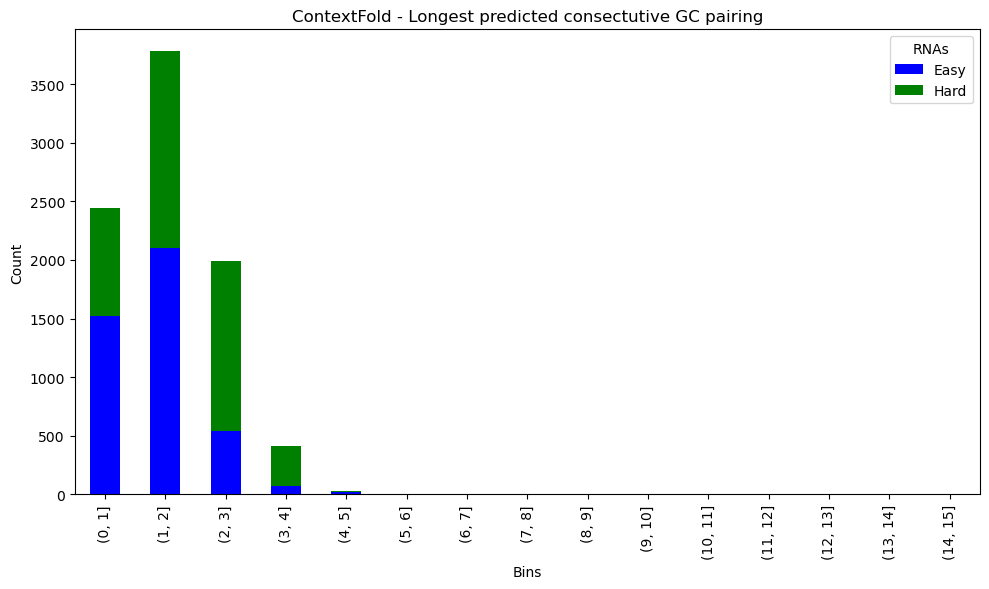

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


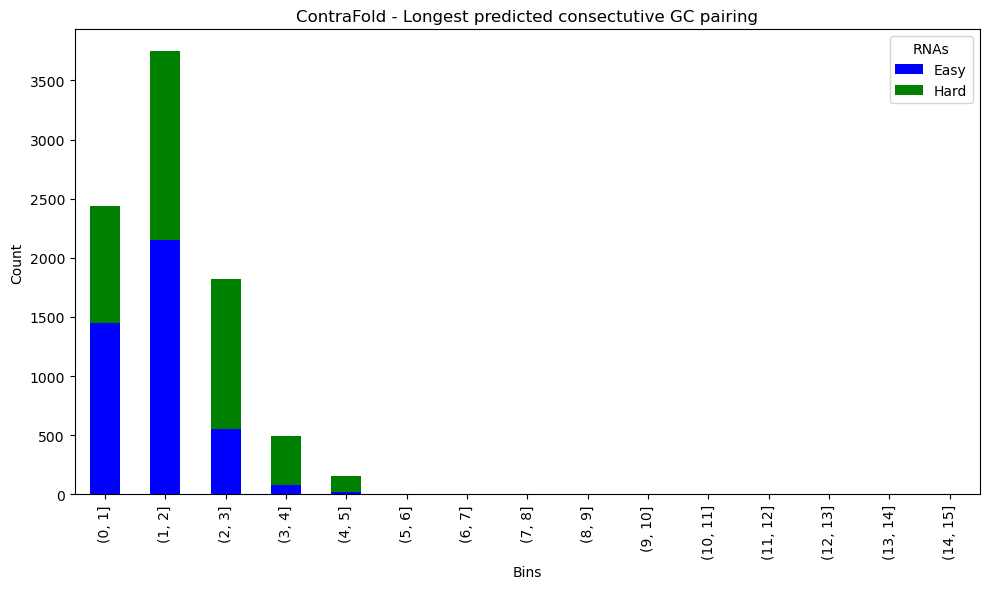

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


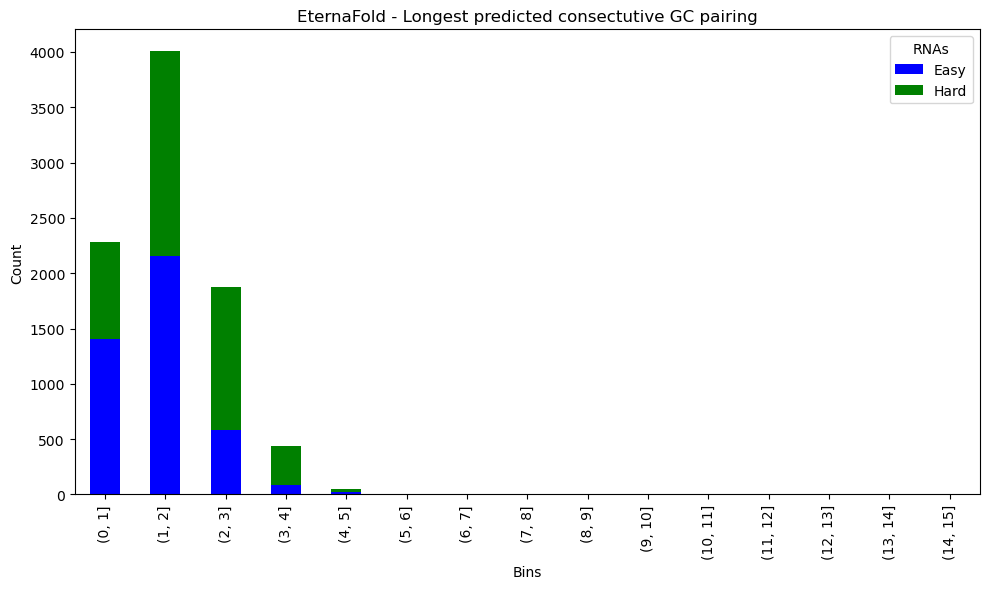

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


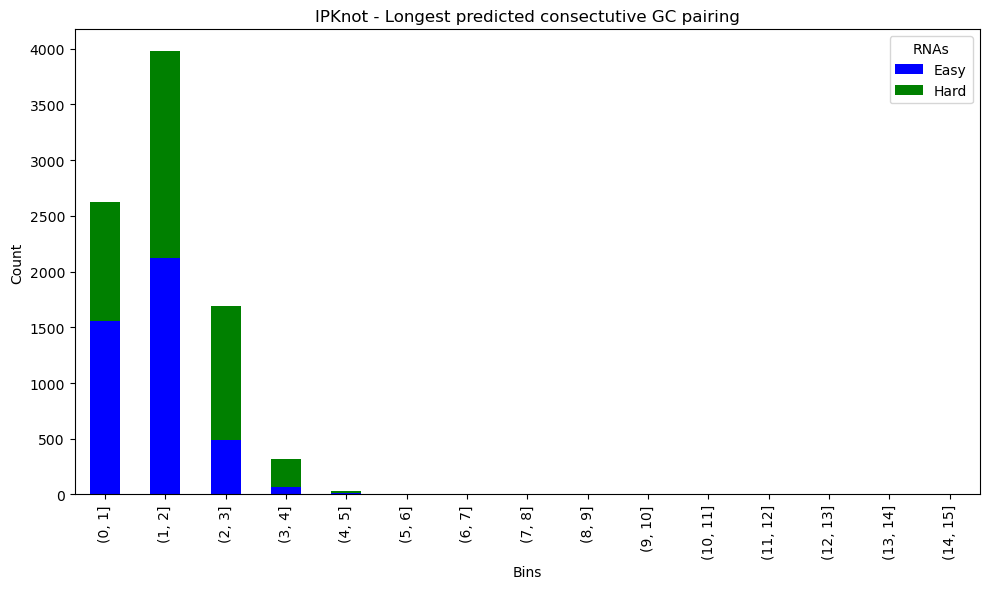

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


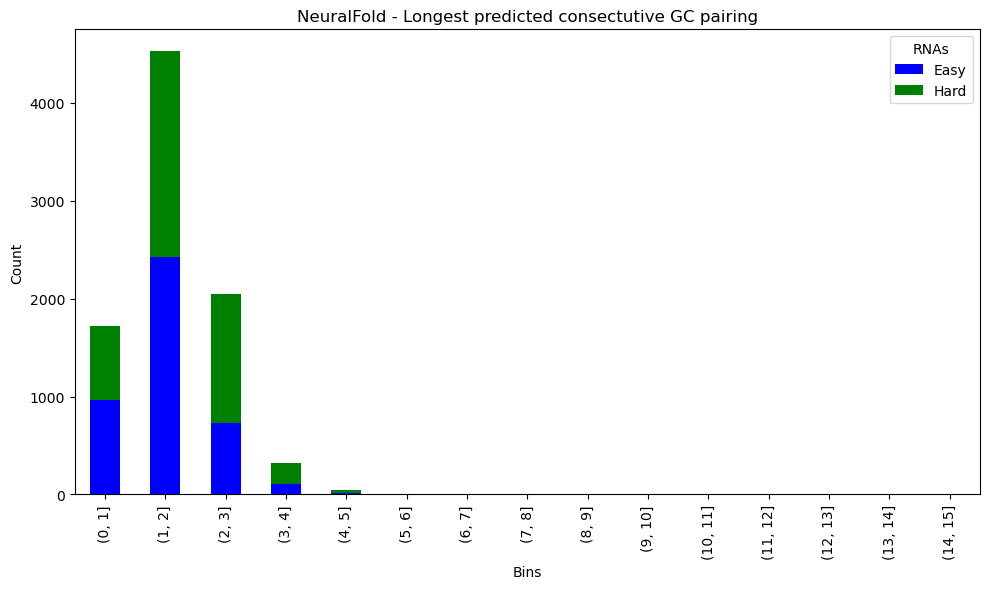

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


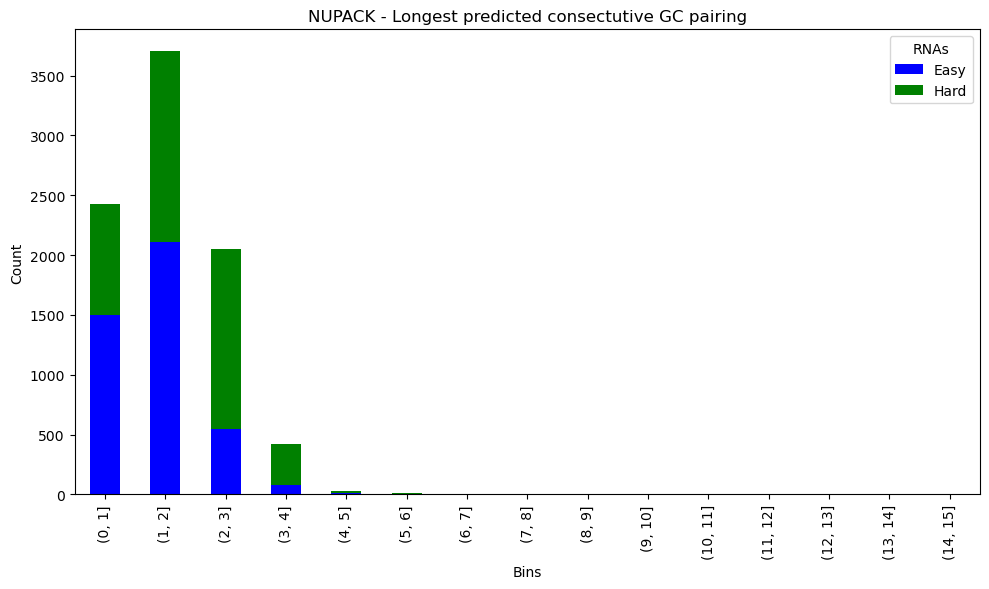

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


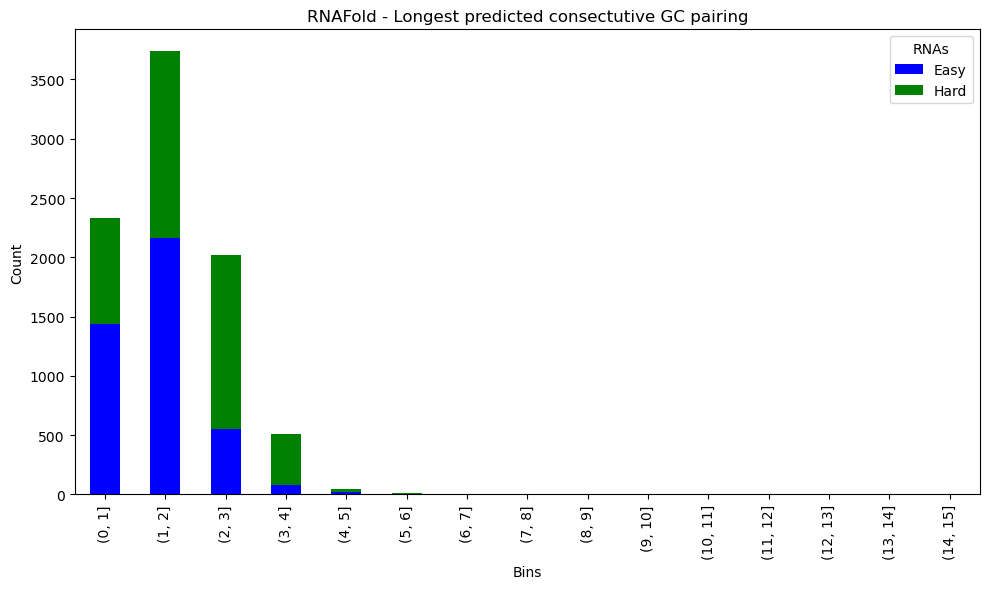

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


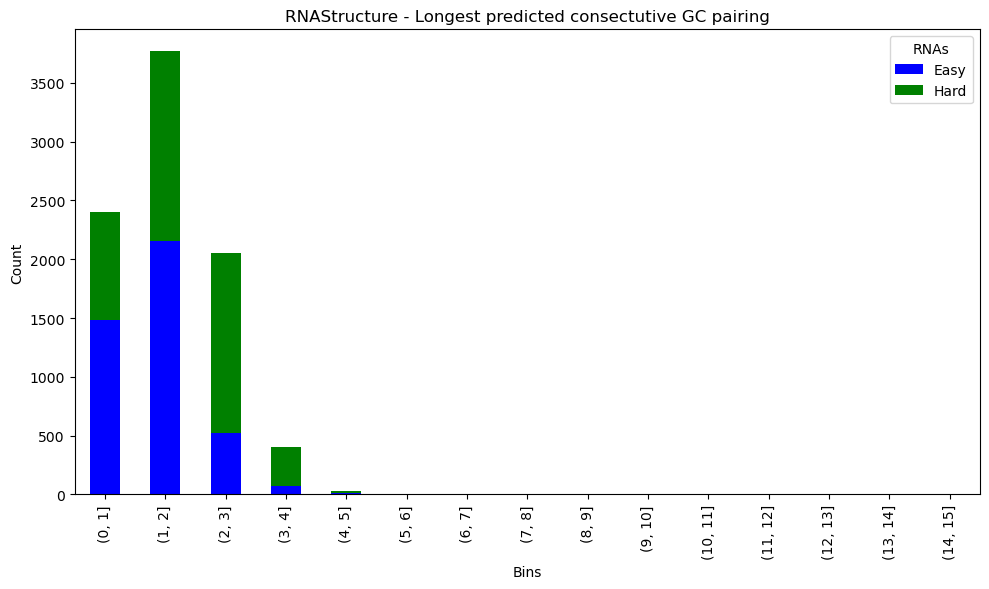

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


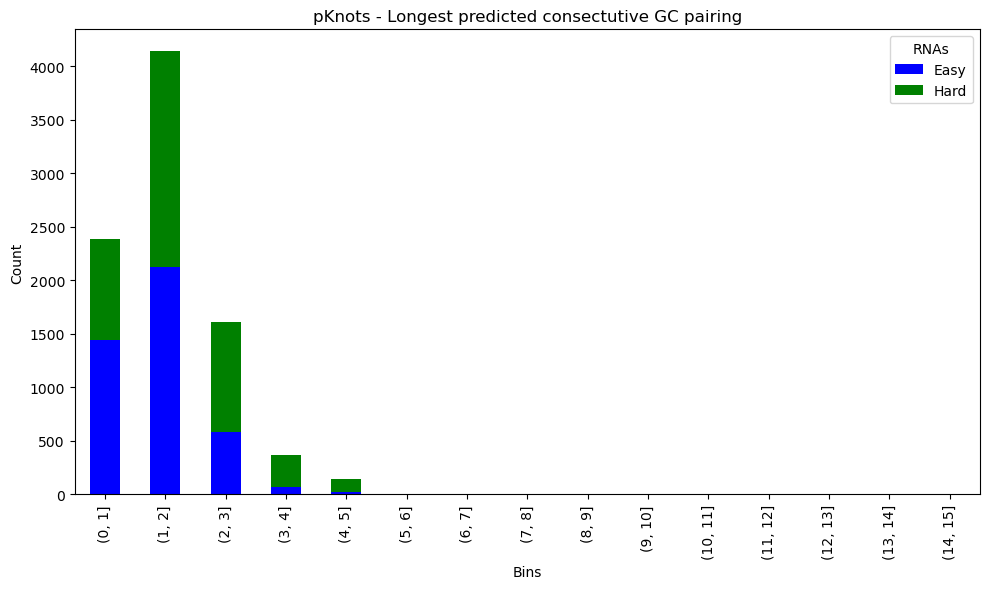

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


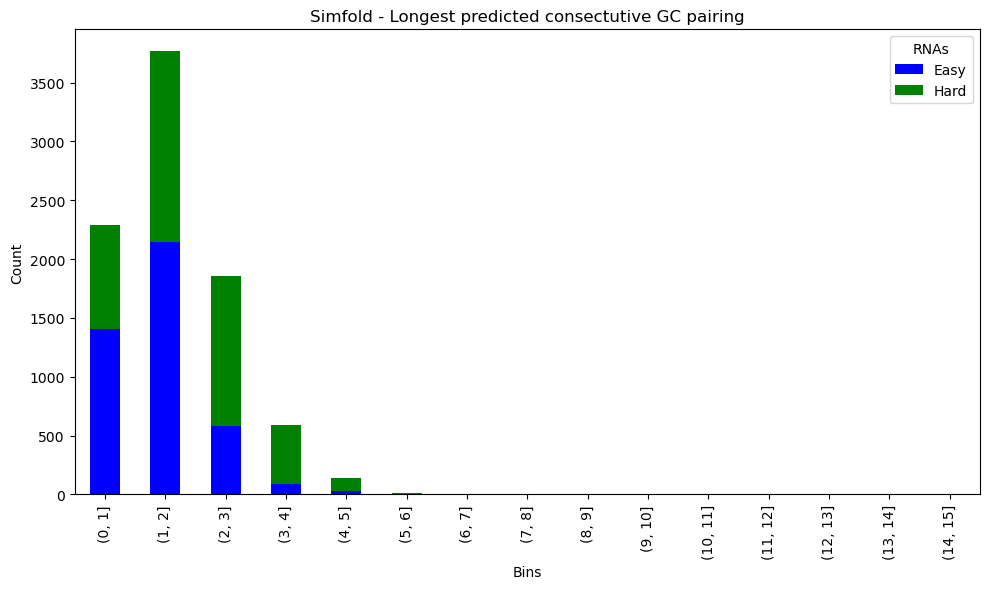

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


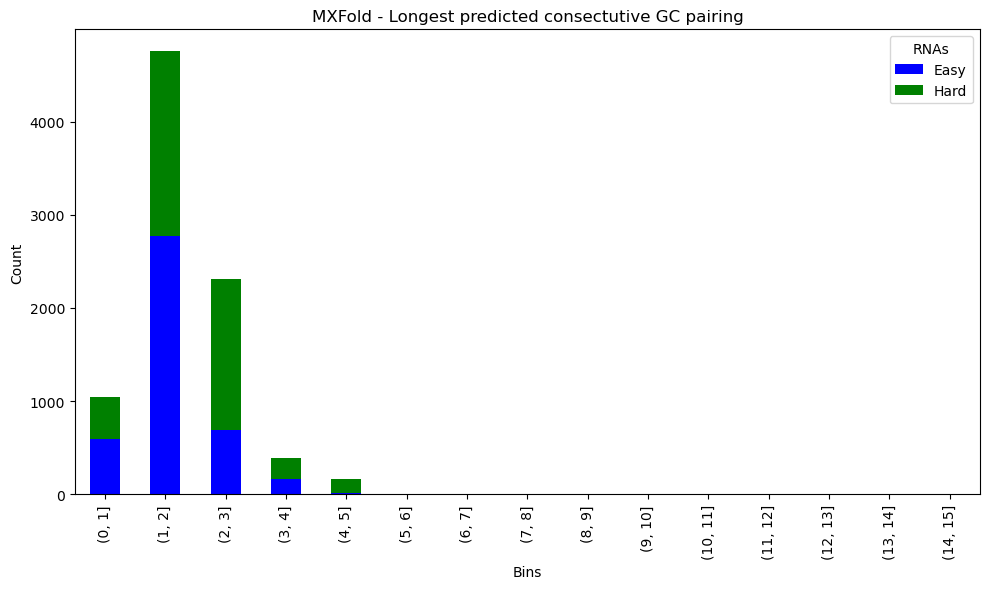

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


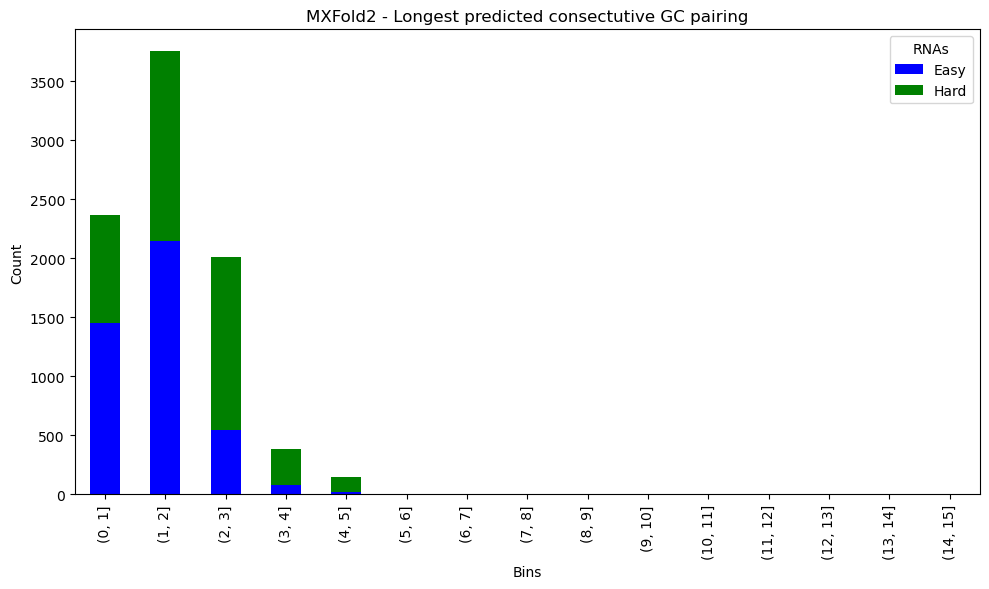

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_8938/2019273105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)


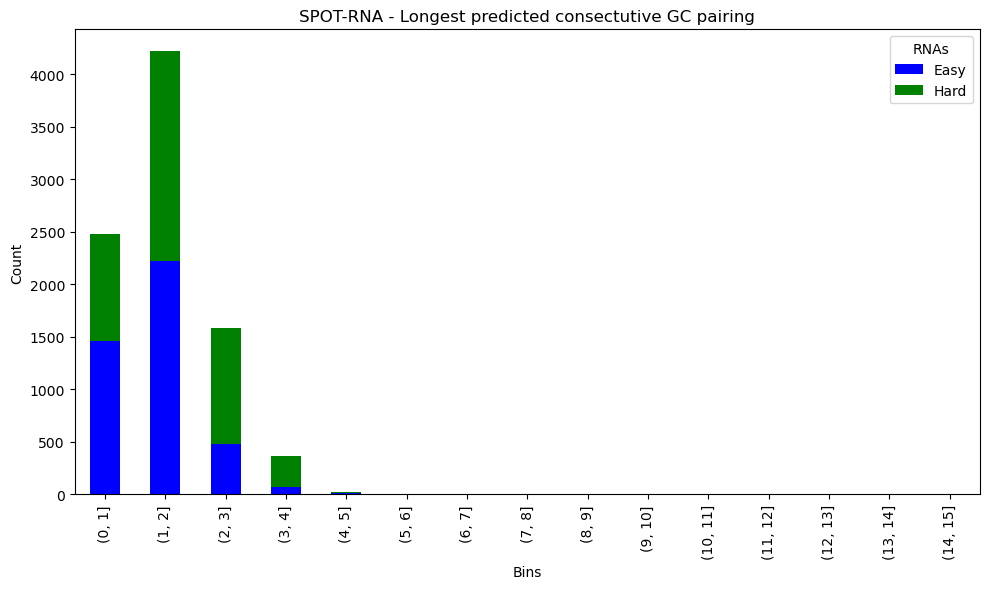

In [84]:
easy_df["group"] = "Easy"
hard_df["group"] = "Hard"

combined = pd.concat([easy_df, hard_df])
bins = range(0, 16)

for m in models:
    combined[f"{m}_longest_GC_pairing"] = pd.cut(combined[f"{m}_longest_GC_pairing"], bins)
    # Count occurrences per bin per group
    counts = combined.groupby([f"{m}_longest_GC_pairing", "group"]).size().unstack(fill_value=0)

    # Make stacked bar chart
    counts.plot(
        kind="bar",
        stacked=True,
        figsize=(10, 6),
        color=["blue", "green"]
    )

    plt.title(f"{m} - Longest predicted consectutive GC pairing")
    plt.xlabel("Bins")
    plt.ylabel("Count")
    plt.legend(title="RNAs")
    plt.tight_layout()
    plt.show()

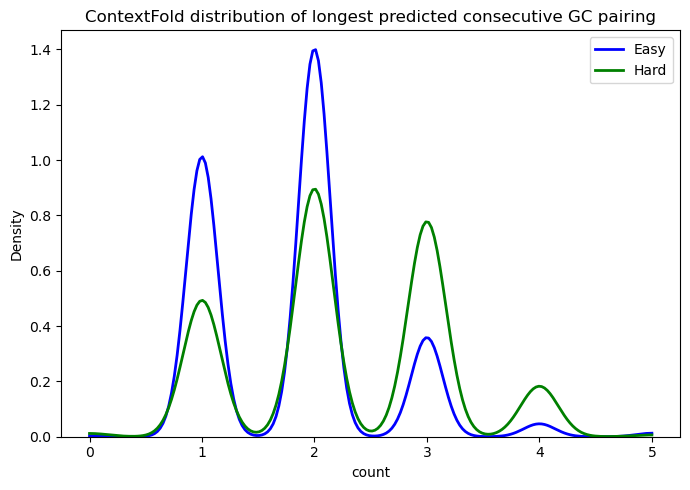

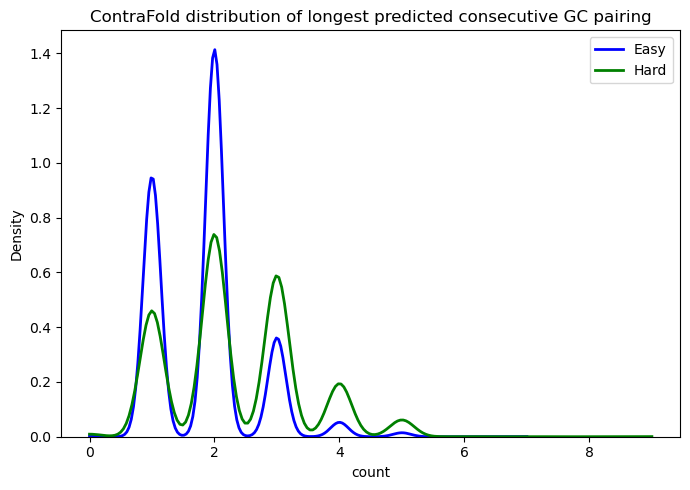

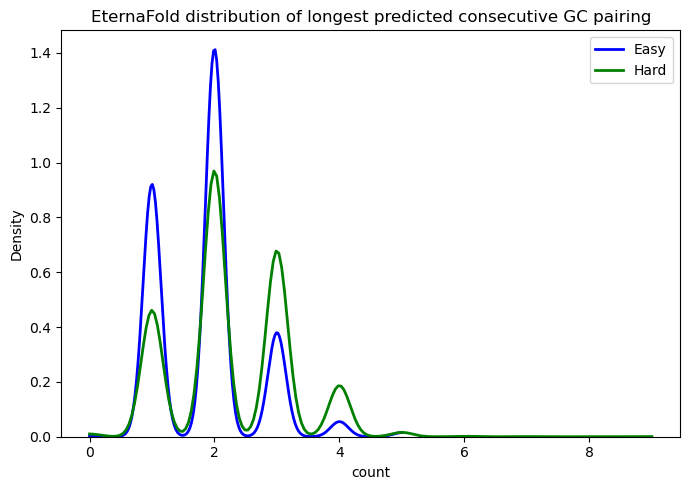

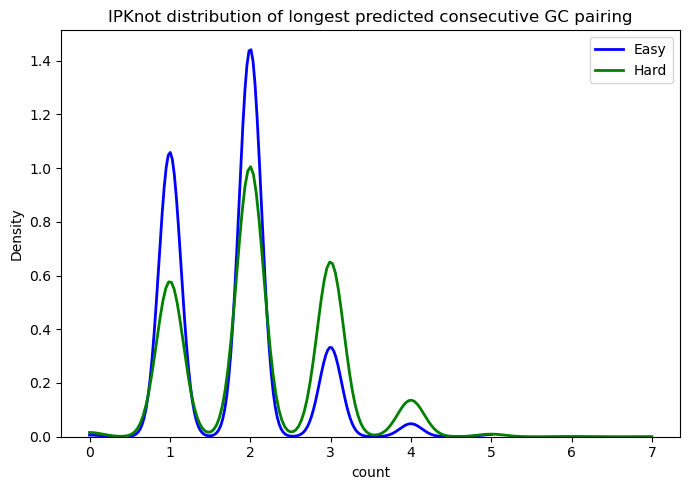

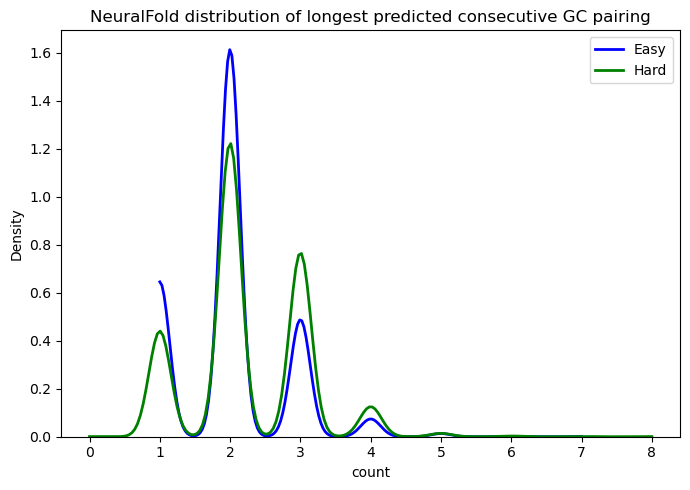

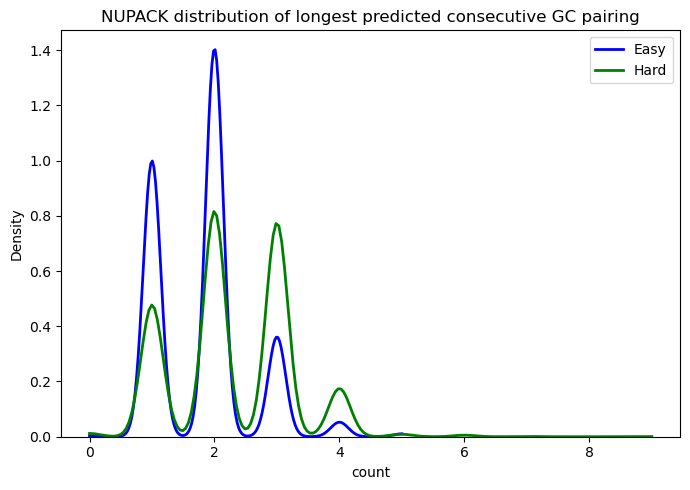

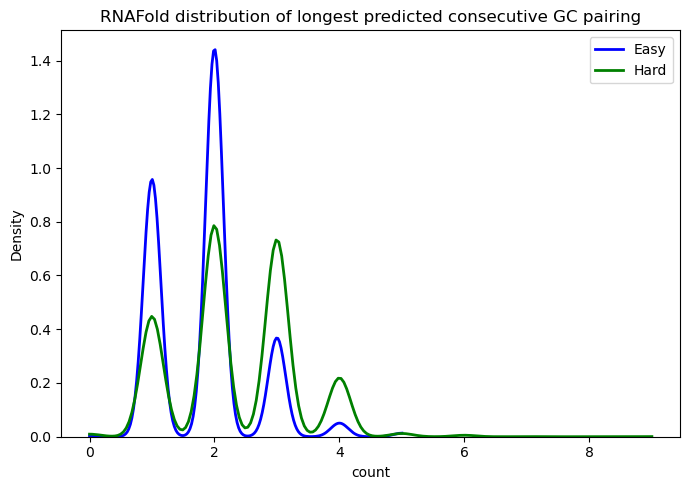

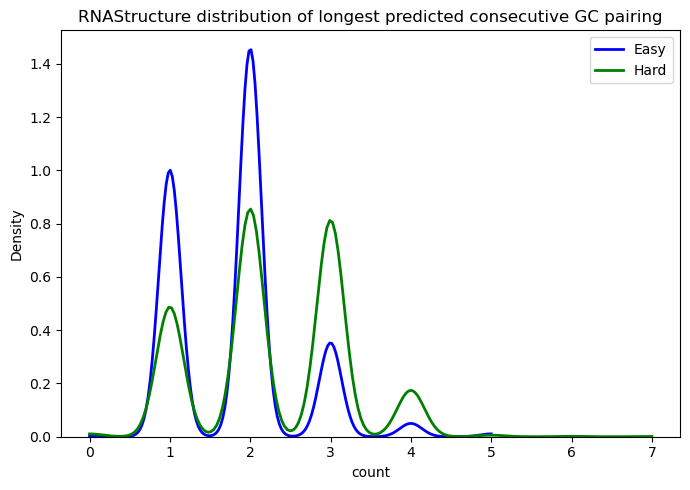

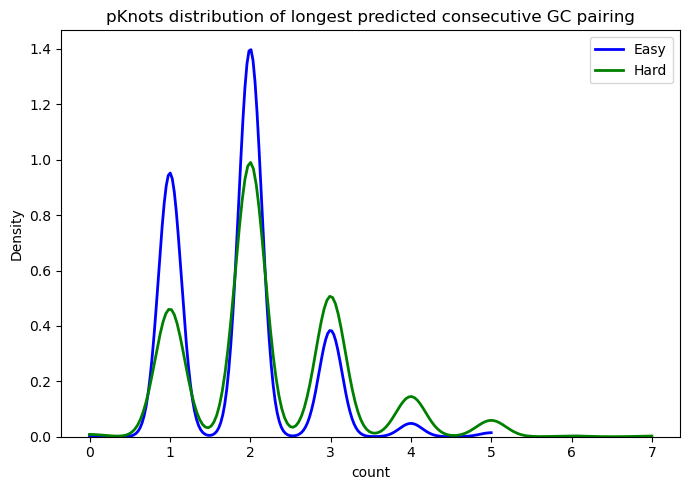

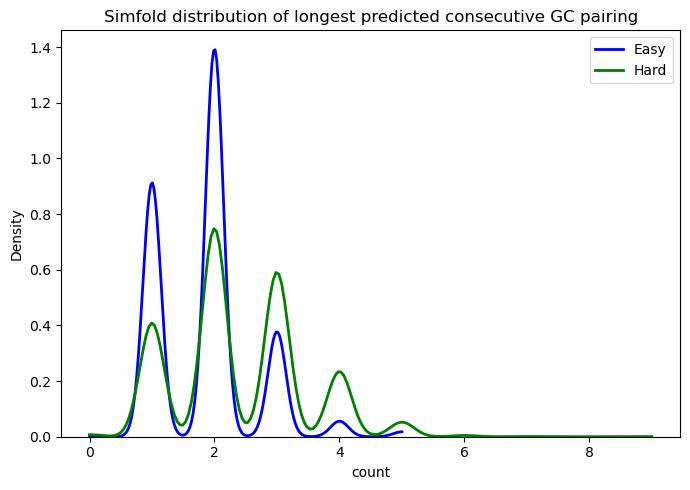

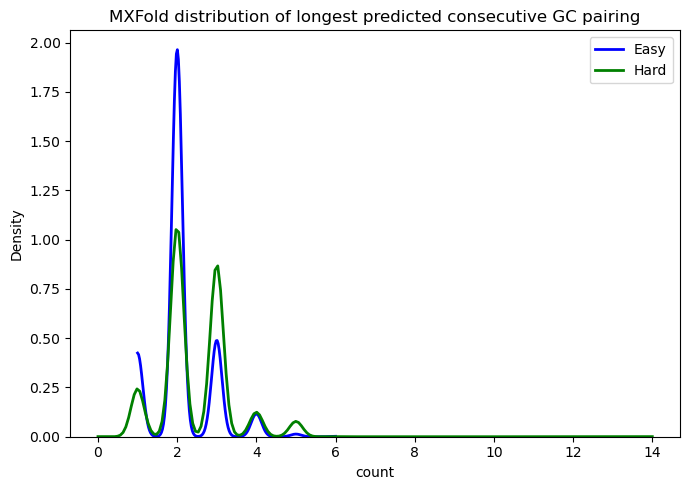

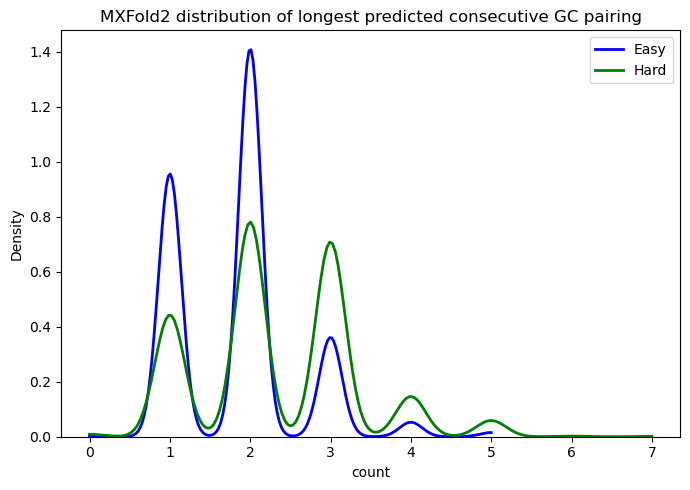

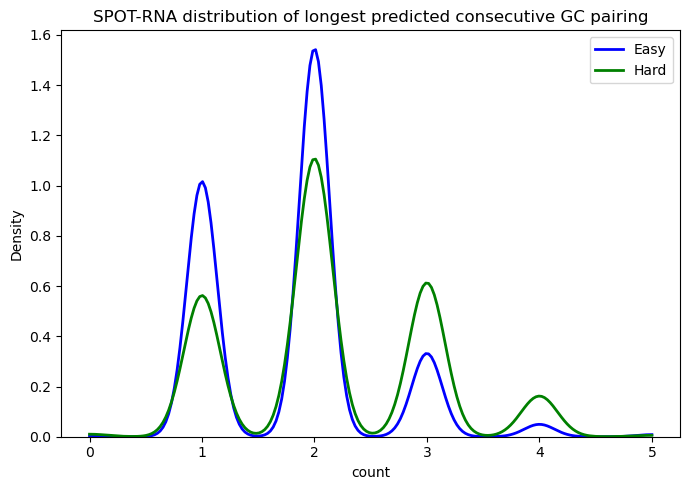

In [92]:
for m in models:
    plt.figure(figsize=(7, 5))
    sns.kdeplot(
        data=easy_df,
        x=f"{m}_longest_GC_pairing",
        color="blue",
        label="Easy",
        lw=2,
        cut=0
    )
    sns.kdeplot(
        data=hard_df,
        x=f"{m}_longest_GC_pairing",
        color="green",
        label="Hard",
        lw=2,
        cut=0
    )
    plt.title(f"{m} distribution of longest predicted consecutive GC pairing")
    plt.xlabel("count")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [91]:
easy_df.head()

,dataset,datapoint,sequence,ContextFold_accuracy,ContextFold_prediction,ContraFold_accuracy,ContraFold_prediction,EternaFold_accuracy,EternaFold_prediction,IPKnot_accuracy,...,IPKnot_longest_GC_pairing,NeuralFold_longest_GC_pairing,NUPACK_longest_GC_pairing,RNAFold_longest_GC_pairing,RNAStructure_longest_GC_pairing,pKnots_longest_GC_pairing,Simfold_longest_GC_pairing,MXFold_longest_GC_pairing,MXFold2_longest_GC_pairing,SPOT-RNA_longest_GC_pairing
0,EternaData,ETERNA_R00_0000_ANNOTATION_1081,GGAAAAAAAGCAUGUACCUACUUUGUAGGUACAUGCAGAUGUAUCU...,0.962121,.........((((((((((((...)))))))))))).(((((((((...,0.962121,.........((((((((((((...)))))))))))).(((((((((...,0.962121,.........((((((((((((...)))))))))))).(((((((((...,0.962121,...,2,2,1,2,2,2,2,2,2,2
1,EternaData,ETERNA_R00_0000_ANNOTATION_1223,GGAAAAAAAAACUUAGGAAAAAACGAAAAAAGAUACGAAAGUAUCG...,0.959677,...............................(((((....)))))....,0.968661,...........(((((...............(((((....)))))....,0.968661,...........(((((...............(((((....)))))....,0.959677,...,1,1,2,2,1,2,1,2,1,2
2,EternaData,ETERNA_R00_0000_ANNOTATION_1227,GGAAAAAAAAACUGUCAAAAAAGCGAAAAAACACAGAAAACUGUGA...,0.913559,............(((................(((((....)))))....,0.928063,...........(((((...............(((((....)))))....,0.928063,...........(((((...............(((((....)))))....,0.928063,...,1,2,1,1,1,1,1,1,1,1
3,EternaData,ETERNA_R00_0000_ANNOTATION_132,GGAAACAAAAAAAAAAAGCAGUCCGAAAGGACAGUACGAAAGUACA...,0.942204,....................((((....)))).((((....))))....,0.942204,....................((((....)))).((((....))))....,0.909091,.................((.((((....)))).((((....))))....,0.942204,...,2,3,2,2,2,2,2,2,2,2
4,EternaData,ETERNA_R00_0000_ANNOTATION_1369,GGAAAAAAAAGCAUAUGCGAAGCAUGCGAAGCAUGCGAAAGCAUGC...,0.917553,..........((((((((...((((((...((((((....))))))...,0.917553,..........((((((((...((((((...((((((....))))))...,0.917553,..........((((((((...((((((...((((((....))))))...,0.917553,...,1,2,1,1,1,1,1,2,1,2


In [94]:
reliable_preds = pd.read_csv("predictions_with_0.6_reactivities_filtered_homopolymers.csv")
reliable_preds.head()

,dataset,model,datapoint,sequence,prediction,accuracy
0,EternaData,ContextFold,ETOBCR_VN1_0001_ANNOTATION_1,GGUGGUAUUCUAAGCGAUGGUGAAACUACUAUUGGGCUUUCUACUC...,.((.....((((((.(..((.....(((....))).....)).).)...,0.574324
1,EternaData,ContextFold,ETOBCR_VN1_0001_ANNOTATION_3,GGCAGAUCGGACUUGUGAAAAUAAUAAUUUUCGCCCGAUGUUCGCU...,.....((((((((.((((((........))))))((((.((((......,0.715321
2,EternaData,ContextFold,ETOBCR_VN1_0001_ANNOTATION_4,GGCAGAUCGGACUUGUGAAAAUAAUAAUUUUCGCCCGAUGUUCGCU...,.....((((((((.((((((........))))))((((.((((......,0.751035
3,EternaData,ContextFold,ETOBCR_VN1_0001_ANNOTATION_5,GGGAGCCGCUACGUACUUGCUUUCAUAAGCAAGUUAGGUGCGUUGC...,.(((((.....(..((((((((....))))))))..)((((...))...,0.479255
4,EternaData,ContextFold,ETOBCR_VN1_0001_ANNOTATION_6,GGGAGCCGCUACGUACUUGCUUUCAUAAGCAAGUUAGGUGCGUUGC...,.(((((.....(..((((((((....))))))))..)((((...))...,0.621277


In [95]:
reliable_preds["accuracy"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
# reliable_preds["accuracy"].agg(["median", "var", "skew", "kurt"])


count    984997.000000
mean          0.765077
std           0.144837
min           0.007042
5%            0.520930
25%           0.657884
50%           0.777826
75%           0.886853
95%           0.969460
max           1.000000
Name: accuracy, dtype: float64

In [96]:
len(reliable_preds)

984997

In [97]:
# Ensure one row per (dataset, datapoint, sequence, model)
rp = (
    reliable_preds
    .loc[reliable_preds["model"].isin(models)]
    .drop_duplicates(subset=["datapoint","model"])
)

# Pivot predictions and accuracies to wide format
pred_pivot = rp.pivot_table(
    index=["datapoint", "sequence"],
    columns="model",
    values="prediction",
    aggfunc="first",
)
acc_pivot = rp.pivot_table(
    index=["datapoint", "sequence"],
    columns="model",
    values="accuracy",
    aggfunc="first",
)

# Suffix/flatten columns
pred_pivot = pred_pivot.add_suffix("_prediction")
acc_pivot  = acc_pivot.add_suffix("_accuracy")

# Combine and restore as a regular DataFrame (sequence is unique per row)
wide = (
    pd.concat([pred_pivot, acc_pivot], axis=1)
    .reset_index()
)

# (Optional) Interleave columns by model for readability
ordered_cols = ["dataset", "datapoint", "sequence"]
for m in models:
    pcol, acol = f"{m}_prediction", f"{m}_accuracy"
    if pcol in wide.columns: ordered_cols.append(pcol)
    if acol in wide.columns: ordered_cols.append(acol)

wide = wide.loc[:, [c for c in ordered_cols if c in wide.columns]]


In [98]:
wide.head()

model,datapoint,sequence,ContextFold_prediction,ContextFold_accuracy,ContraFold_prediction,ContraFold_accuracy,EternaFold_prediction,EternaFold_accuracy,IPKnot_prediction,IPKnot_accuracy,...,pKnots_prediction,pKnots_accuracy,Simfold_prediction,Simfold_accuracy,MXFold_prediction,MXFold_accuracy,MXFold2_prediction,MXFold2_accuracy,SPOT-RNA_prediction,SPOT-RNA_accuracy
0,0002c8096f3a,CAUGCUUCAUACCCAGAGAGAAGCCCCCCGCUUCCCAGGCAUGCUU...,.....(((((((((((((((((((.(((.(...(((((((((((((...,0.689784,....((((((((((((((((((((.(((.(...(((((((((((((...,0.724074,....((((((((((((((((((((.(((.((..(((((((((((((...,0.732639,....((((((((((((((((((((.(((.....(((((((((((((...,0.735257,...,....(((((((((((((((((((((((......(((((((((((((...,0.732766,....(((((((((((((((((((((((......(((((((((((((...,0.732766,....((((((((((((((((((((.(((.....(((((((((((((...,0.737103,....(((((((((((((((((((((((......(((((((((((((...,0.732766,....((((((((((((((((((((.(((...(.(((((((((((((...,0.755463
1,0003b762a9ad,GGAAAUCUGCCCUCAGAGCUUGAGAACAUCUUCGGAUGCAGAGGAG...,.(((..((((((((.......)))..((((....)))).......)...,0.700774,.....((((....))))..((((((((.(((((.......)))))....,0.693878,.(((..((((((((.......)))....(((((.......))))))...,0.709302,......(((((..................................)...,0.850909,...,......(((((((((.....))))..((((....))))(....).)...,0.650966,((...((((....))))..((((((((.((....))..((..((((...,0.679528,(.....((((((((.......)))..((((....)))).......)...,0.747061,...................(((((((((((....))).....((((...,0.703868,......(((.................(((((..))))))))........,0.633036
2,00058d9903ea,GGAAGCCUUAGGAAACCAUAGCGGAAACUCUAUGGAAACCCUAUGA...,......((((((...((((((.(....).)))))).....(((((....,0.949163,....(.((((((...((((((.(....).))))))...(.(((((....,0.908197,....(.((((((...((((((.(....).))))))...(.(((((....,0.908197,....((.........((((((........))))))..............,0.818850,...,..........(....)(((((.(....).)))))......(((((....,0.656746,....(.((((((...((((((.(....).))))))...(.(((((....,0.908197,(.....((((((...((((((.(....).)))))).....(((((....,0.937650,....(.((((((...((((((.(....).)))))).....(((((....,0.923931,......((((((...((((((........))))))....).((((....,0.930338
3,0005ffce1b2d,GGGAACGACUCGAGUAGAGUCGAAAAGGUAGACUCGCAGGAAGUCU...,......(((((.....))))).....(((((((.........))))...,0.627711,.....((((((.....))))))....((((((((.......)))))...,0.625391,.....((((((.....))))))....(((((((((....).)))))...,0.631597,.....((((((.....))))))....((((((((.......)))))...,0.681785,...,.....((((((.....))))))....((((((((.......)))))...,0.618808,(((..(((((..(((.(((((((...(((((((((....).)))))...,0.657279,(....((((((.....))))))....(((((((((....).)))))...,0.657160,((...((((((.....))))))....(((((((((....).)))))...,0.646299,.....((((((.....))))))....((((((((.......)))))...,0.669414
4,00067625f07e,GGAAACACGCGCGCUAUUUAUACUACGGUAACUGAUCACAGACUCU...,.....(((((((((((((..(((....)))............(((....,0.871380,.....((((((((((((((.(.....(((..(((....)))))..)...,0.808937,.....((((((((((((((...(....(...(((....))).)((....,0.874032,.....((((((((((((((............(((....)))........,0.882993,...,.....((((((((((((((.(((....))).(((....))).(((....,0.844528,.....((((((((((((((.(((....)))............(((....,0.862732,(....((((((((((((((.(((....)))............(((....,0.861111,.....((((((((((((((.......(....)..........(((....,0.880066,.....((((((((((((((.......................(((....,0.881944


In [101]:
wide.to_csv("reliable_predictions_pivoted.csv", index=False)

In [139]:
df = wide

hard_threshold = 0.57
easy_threshold = 0.878

# model accuracy columns present in the DF
acc_cols = [f"{m}_accuracy" for m in models if f"{m}_accuracy" in df.columns]

# --- Strict version: every model present AND meets the condition (NaNs fail) ---
all_hard_strict = df[acc_cols].le(hard_threshold).all(axis=1)
all_easy_strict = df[acc_cols].ge(easy_threshold).all(axis=1)

n_all_hard_strict = int(all_hard_strict.sum())
n_all_easy_strict = int(all_easy_strict.sum())

hard_rows = df.loc[all_hard_strict]
easy_rows = df.loc[all_easy_strict]


print(f"Hard count: {len(hard_rows)}")
print(f"Easy count: {len(easy_rows)}")

Hard count: 3031
Easy count: 3062


In [140]:
hard_rows.to_csv("hard_reliable_subset.csv", index=False)
easy_rows.to_csv("easy_reliable_subset.csv", index=False)